Source: \
https://www.adeveloperdiary.com/data-science/machine-learning/linear-discriminant-analysis-from-theory-to-code/

https://sebastianraschka.com/Articles/2014_python_lda.html

https://www.adeveloperdiary.com/data-science/machine-learning/linear-discriminant-analysis-from-theory-to-code/

Notebook Contents: 

1. Introduction 
2. Two Class LDA Implementation (Hand Calculations)
3. Naive Implementation of LDA algorithm on the Iris Dataset
4. Limitations of LDA

# Introduction

Linear discriminant Analysis (LDA) is an important tool in both classification and Dimensionality Reduction technique. 

**Objective**

The basic idea is to find a vector $w$ which maximizes the seperation between target classes after projecting them onto $w$.\
LDA is a supervised learning algorithm, hence we need to have the target classes specified.

**Orthogonal Projection**
As per the objective, we need to project the input data onto $w$ vector. 

Assume that we already known $w$. Now let's derive the equation for orthogonally projecting $x$ (input vector) onto the vecotr $w$.

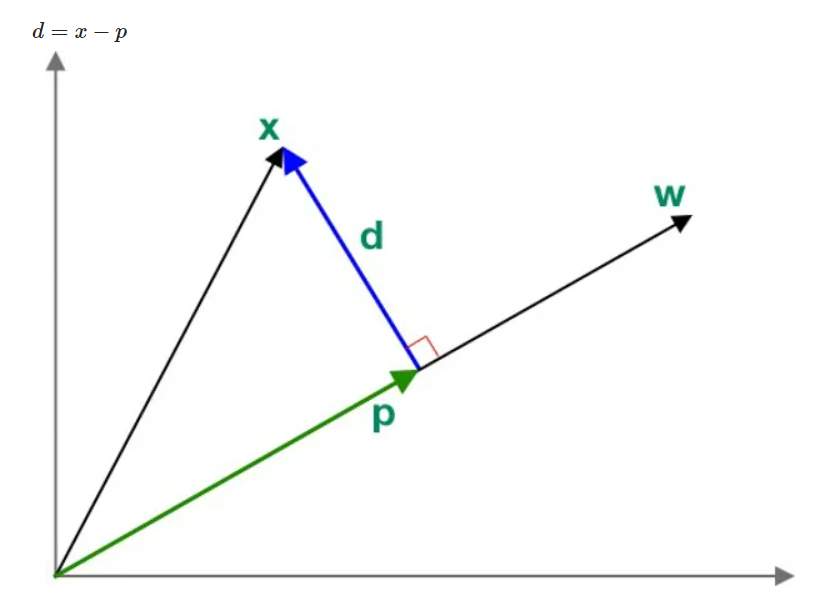

Since $p$ is parallel to $w$, we can write,

$p=cw$
where $c$ = some scalar
We can rewrite $d$ as,\
$d=x-p = x -cw$

We know that if two vectors are orthogonal to each other than the dot product between them will be $0$. In this case, $p$ and $d$ are orthogonal to each other, hence we can write them as,

\begin{align}
p^Td &=0\\
(cw)^T(x-cw) &=0\\
cw^Tx -c^2w^Tw &=0\\
cw^Tw &= w^Tx\\
c &= \frac{w^Tx}{w^Tw}
\end{align}

we can write the expression for $p$ as :    
$p = \big(\frac{w^Tx}{w^Tw}\big)w$

**Optimal Linear Discriminant**

First we will develop the general concept on building an Optimal Linear Discriminant, then work on the object function later. 

Assume $w$ to an unit vector ,which means,
\
$w^Tw=1$\
\
We can write the orthogonal projection of any n-dimensional vector $\hat{x}_i$ onto the vector $w$ as,

\begin{align}
\hat{x}_i& = \big(\frac{w^Tx}{w^Tw}\big)w\\
&=(w^Tx)w\\
&=a_iw
\end{align}

Above $a_i$ is the offset/coordinate of $\hat{x}_i$ along the line $w$. as set of these scalar values $\{a_1,a_2,\ldots,a_n\}$ represents the mapping from $R^d ⟶ R$. This means if we know the value of $w$, we can reduce the dimension
of the data from d-dimension to 1-dimension.

**Dataset Assumptions**

Just for simplicity, assume our dataset has only 2 target classes and 2 input fields. This will help us to visualise the results effectively.

$x_i \in R^d$ where $d=2$
Also, we can define $D$ as following \
$D_i = \{ x_j|y_j =c_i\}$

Here, $y_i$ is the target labels and $c_i$ is the target class .$D_i$ is the subset of the datasets labelled with class $c_i$.

**Mean of the Projected Points**

Since we already known the target class labels, we can easily calculate the mean of the projected data points for each class separately as,

\begin{align}
m_1 &= \frac{1}{n_1} ∑_{x_i\in D_1} a_i\\
&=  \frac{1}{n_1} ∑_{x_i\in D_1} w^Tx\\
&= w^T\big( \frac{1}{n_1} ∑_{x_i\in D_1} x\big)\\
&= w^T μ_1
\end{align}

Here, $μ_1$ is the mean of all input data points in $D_1$.

Very similarly, we can define $m_2$ as,

$m_2 = w^Tμ_2$


**Two Important Ideas:**

In order to maximize the separation between the classes ( in the projected space), we can think of maximizing the difference between the projected means $|m_1 - m_2|$. 

However, this condition alone is not sufficient to make sure in the projected space the data points are separated for each class. We need to think about the variancec of the projected data in each class. \
*A large variance will lead to overlapping data points among two classes.*

So, we need to loop at minimizing the variance in class too. LDA does not use the variance directly, rather uses the following formulation.

\begin{align}
s_i^2 = Σ_{x_j \in D_i} (a_j - m_i)^2
\end{align}

$s_i^2$ is the total squared deviations from the mean . This is also known as the **scatter matrix**




## Fisher's LDA

We can incorporate the above two idea,

- Maximize the distance between projected means
- Minimize the sum of the projected scatter

into one equation, named as Fisher's LDA

\begin{align}
\mathop{max}_{{w}} J(w) = \frac{(m_1-m_2)^2}{s_1+s_2}
\end{align}

So the goal of LDA is to find the vector $w$ which maximizer $J(w)$. This vector $w$ is also called the **Optimal Linear Discriminant**.

**Rewrite the Equation using Input Data**

The above objective function is in projected sapce, so let's express it using the input data, since $w$ is still unknown.

\begin{align}
(m_1 -m_2)^2 &= (w^Tμ_1 - w^Tμ_2)^2 \\
&= [w^T(μ_1 - μ_2)]^2 \\
&= w^T (μ_1 - μ_2)(μ_1 -μ_2)^T w\\
&=w^TBw 
\end{align}
\
Here, $B$ is called  between class **Scatter Matrix**. It will be $d×d$ matrix.
\
\
\begin{align}
s_1^2 &= \mathop{Σ}_{{x_i\in D_i}} (a_i - m_1)^2 \\
&=  \mathop{Σ}_{{x_i\in D_i}} (w^tx_i - w^Tμ_1)^2 \\
&= \mathop{Σ}_{{x_i\in D_i}} \big(w^t(x_i - μ_1)\big)^2 \\
&= w^T \big(\mathop{Σ}_{{x_i\in D_i}} (x_i - μ_1)(x_i - μ_1)^T\big)w\\
&= w^tS_1w
\end{align}

Above $S_1$ is the scatter matrix for $D_1$

Similarly, we can define $S_2$

$s_2 = w^TS_2w$

We can combine the above equations

\begin{align}
s_1^2 + s_2^2 & = w^TS_1w + w^TS_2w\\
&= w^T(S_1+S_2)w\\
&=w^TSw
\end{align}

Now, we can rewrite the LDA **Objective Function** as,

$\mathop{{max}}_{{w}} J(w) = \frac{w^TBw}{w^TSw}$

### Solving the Objective Function:

 In order to solve for the best direction of $w$ we need to differentiate the objectve function w.r.t $w$ and set that to zero.

 recall 


 $\frac{d}{dx}\big( \frac{f(x)}{g(x)}\big) = \frac{f'(x)g(x) -g'(x)f(x)}{g(x)^2}$

 We can use the above formula to differentiate our cost/objective function.

 \begin{align}
 \frac{d}{dw} J(w) &= \frac{(2Bw)(w^tSq) - (2Sw)(w^TBw)}{(w^Sw)^2}=0\\
 Bw(w^TSw) &= Sw(w^TBw)\\
 Bw &= Sw \frac{w^TBw}{w^TSw} \\
 Bw &= J(w) Sw \\
 Bw &= λSw\\
 (S^{-1} B)w &= λw
 \end{align}

 If the $S$ not a singular matrix (inverse exists) then the above equation can be considered as general **Eigenvalue-Eigenvector** decomposition. 
$ λ = J(w)$ is Eigenvalue and $w$ is the Eigenvector of the matrix **$S^{-1}B$**.

Now all we have to do is calculate the Eigen decomposition of $S^{-1}B$, then get the Eigen vector corresponding to the largest Eigenvalue. That will be our optimized best valued $w$ vector.

# Two classes LDA Implementation ( Hand Calculations)

Samples for class\
$ω_1 : X_1 =(x_1,x_2) = {(4,2),(2,4),(2,3),(3,6),(4,4)}$
$ω_2 : X_2 =(x_1,x_2) = {(9,10),(6,8),(9,5),(8,7),(10,8)}$

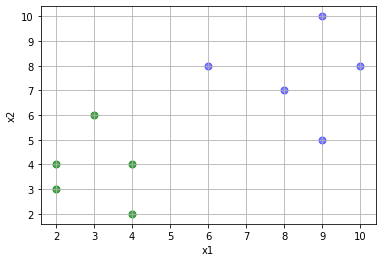

In [101]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]])
X2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

#Scatter Plot

plt.scatter(X1[:,0], X1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(X2[:,0], X2[:,1],s=50,marker='o', c='blue',alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
# depict illustration
plt.grid()
plt.show()

**Calculations**

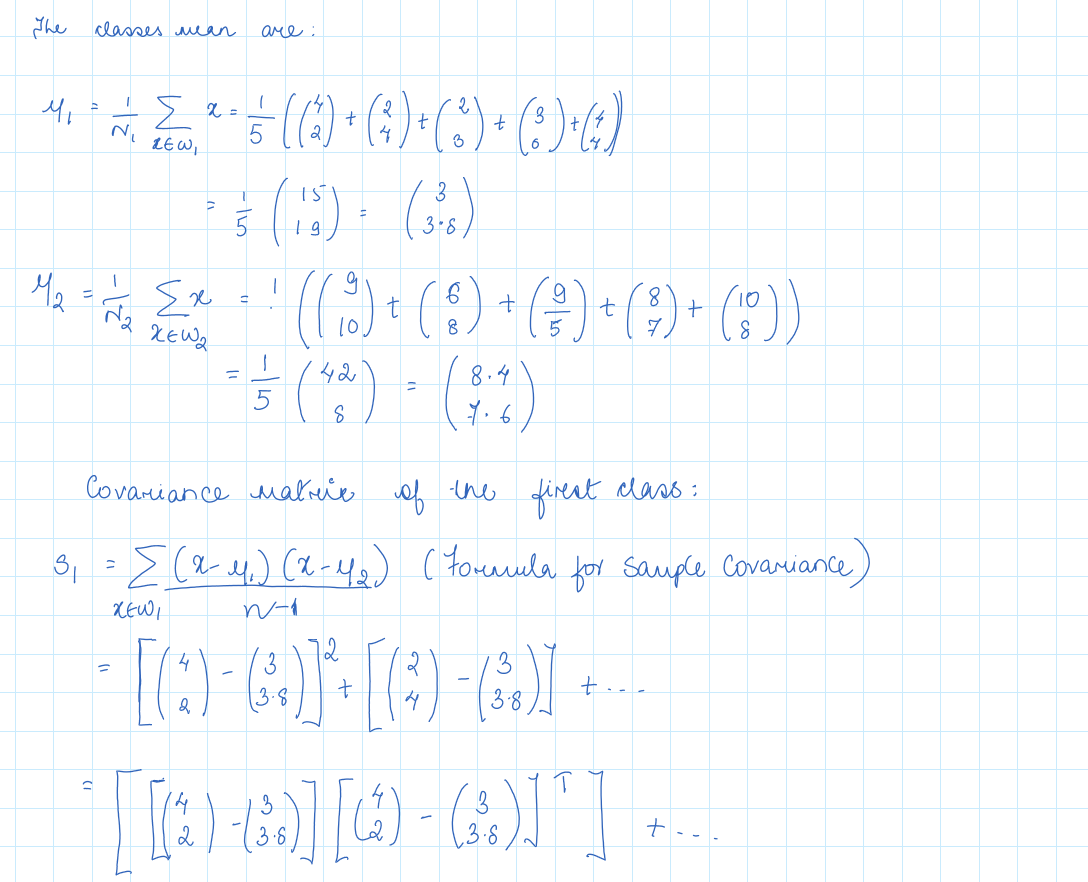

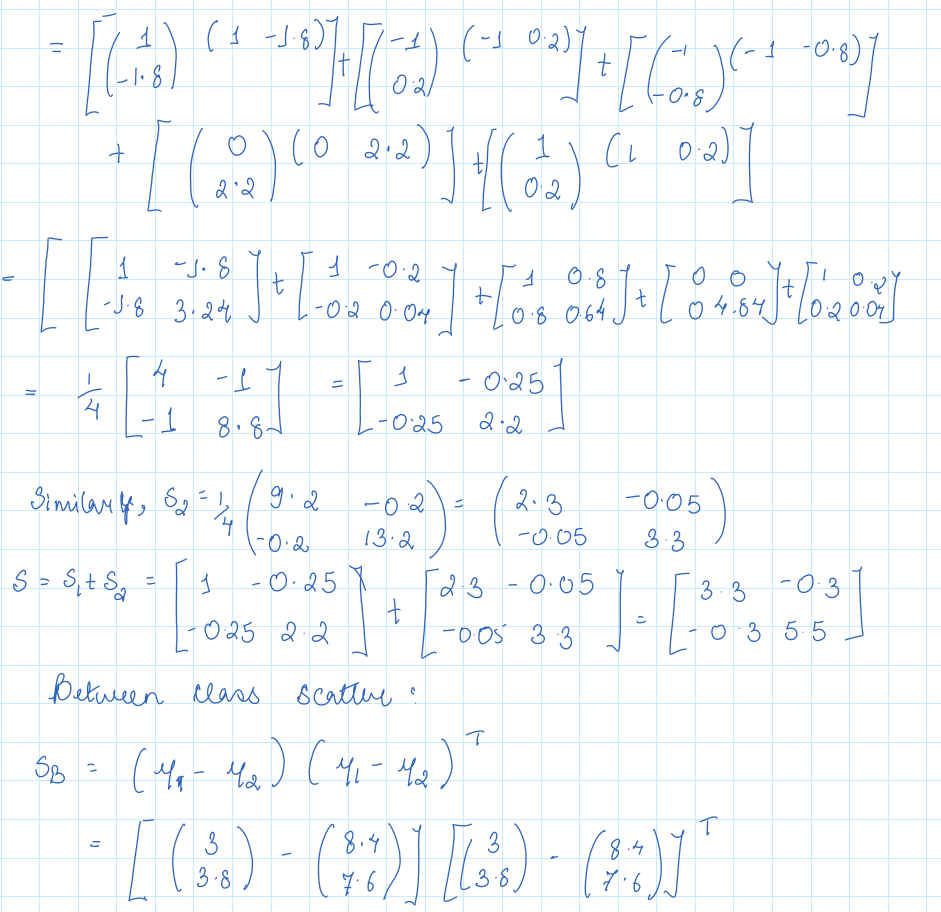

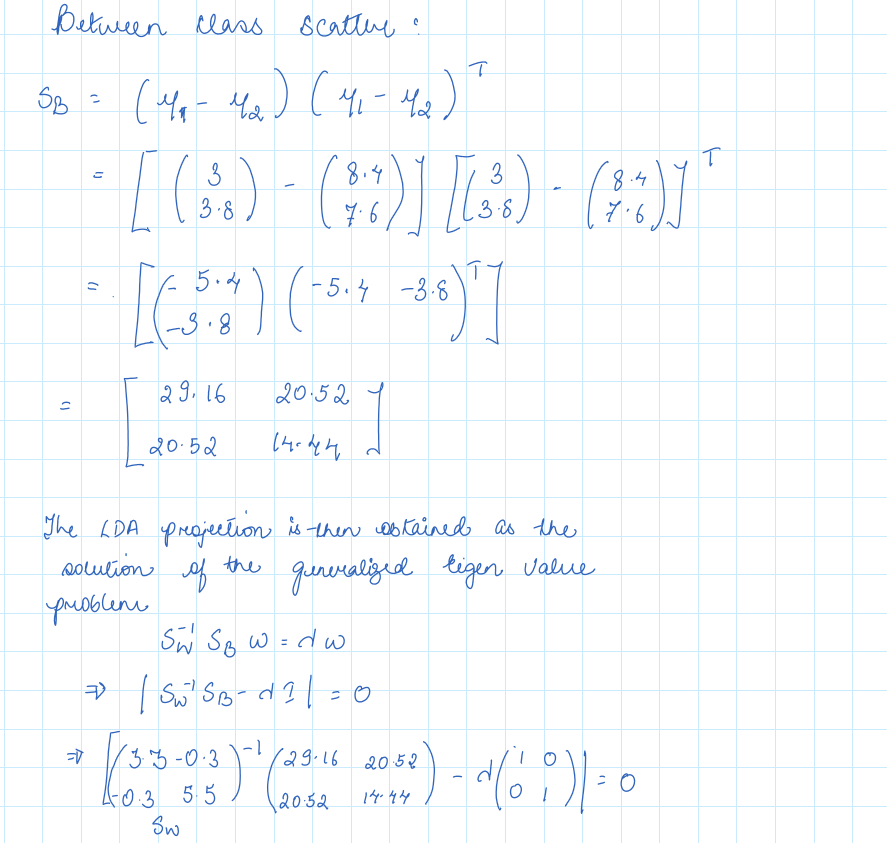

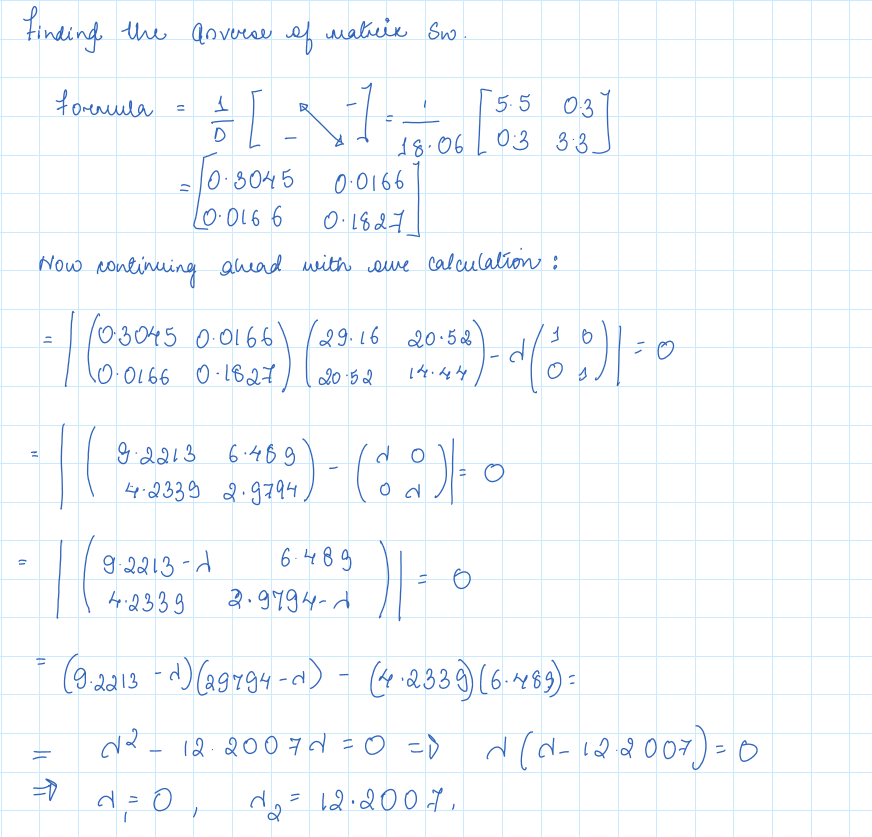

In [106]:
from numpy.linalg import eig
a = np.array([[9.2213, 6.489], 
              [4.2339, 2.9794]])
eig_val,eig_vec=eig(a)

print(abs(eig_val))
print(eig_vec[0]) # We are interested in the eigen vector corresponding to the highest eigen value.

[1.22006865e+01 1.34517020e-05]
[ 0.90878551 -0.57549023]


# Naive Implementation of the LDA using the Iris Dataset

1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors $(e_1,e_2,...,e_d)$ and corresponding eigenvalues $(λ_1,λ_2,...,λ_d)$ for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW (where every column represents an eigenvector).
5. Use this $d × k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: $Y=X \times W$ (where $X$ is a $n\times d$-dimensional matrix representing the n samples, and $y$ are the transformed $n \times k$-dimensional samples in the new subspace).

In [150]:
from sklearn import datasets
import numpy as np
from sklearn.utils import shuffle
iris = datasets.load_iris()
iris.data[:, 0:4]
y = iris.target.reshape(len(X),1)
data = np.hstack((X,y))
data1 = data[data[:,-1]==0]
data2 = data[data[:,-1]==1]
data3 = data[data[:,-1]==2]

0
1
2
3


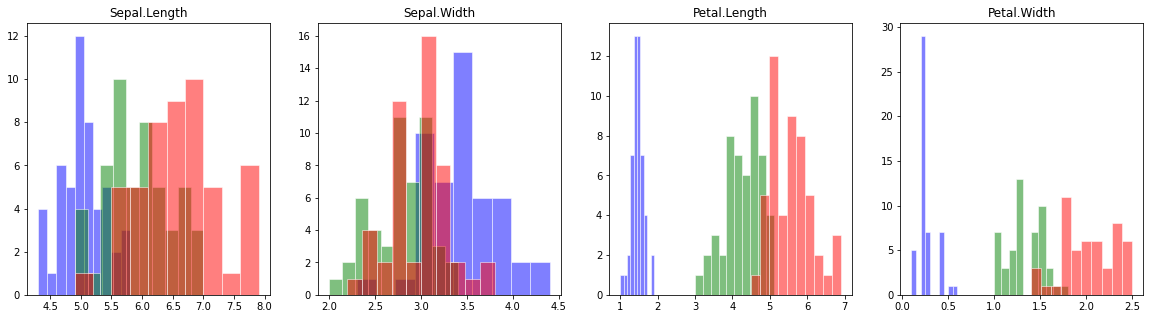

In [155]:
# Plot histograms for all the 4 features of the Iris Data set .
n_bins = 10
cols = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
#fig, axs = plt.subplots(2, 2,figsize=(15,15), sharey=True, tight_layout=True)
fig, axs = plt.subplots(1, 4,figsize=(20,5))
for i in range(0,4):
    print(i)
    axs[i].hist(data1[:,i],color='blue',edgecolor='white',alpha=0.5,bins=n_bins)
    axs[i].hist(data2[:,i],color='green',edgecolor='white',alpha=0.5,bins=n_bins)
    axs[i].hist(data3[:,i],color='red',edgecolor='white',alpha=0.5,bins=n_bins)
    axs[i].set_title(cols[i])
plt.show()

In [ ]:
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target.reshape(len(X),1)
data = np.hstack((X,y))
data1 = data[data[:,-1]==1]
data2 = data[data[:,-1]==2]
data2 = data[data[:,-1]==2]
data3 = np.vstack((data1,data2))
data3 =shuffle(data3)

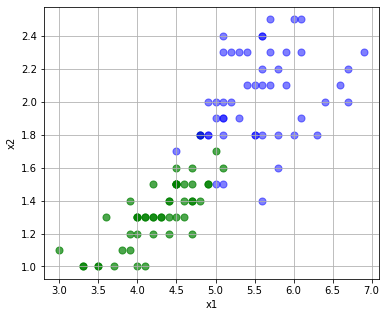

In [43]:
import numpy as np
import matplotlib.pyplot as plt


#Scatter Plot
plt.figure(figsize=(6,5))
plt.scatter(data1[:,0], data1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(data2[:,0], data2[:,1],s=50,marker='o', c='blue',alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
# depict illustration
plt.grid()
plt.show()

In [45]:
class LDA:

  def __init__(self,data):
    self.data = data
    

  def fit(self):

    ########################################################################
    # Mean of all features are calculated filters on Unique class
    # And also calculate the between class scatter [ B ]
    ########################################################################

    unq_classes = np.unique(self.data[:,-1])
    mean_vec = np.zeros((len(unq_classes),self.data[:,0:-1].shape[1]))

    for i in range(len(unq_classes)):
      mean_vec[i,:]= np.mean(self.data[self.data[:,-1]==unq_classes[i]],axis=0)[0:-1]
    
    if len(unq_classes) == 2:
     
      mu1_mu2 = np.array(mean_vec[0,:] - mean_vec[1,:]).reshape(self.data.shape[1]-1,1)
      B = np.dot(mu1_mu2,mu1_mu2.T)
      
    else:

      table_mean = np.mean(self.data[:,0:-1],axis=0)
      B = np.zeros((self.data[:,0:-1].shape[1],self.data[:,0:-1].shape[1]))

      for i in range(len(unq_classes)):
        n = len(self.data[self.data[:,-1]==unq_classes[i]]) # no of elements in the given class
        mu_mean = np.array(mean_vec[i,:] - table_mean).reshape(self.data.shape[1]-1,1)
        B += n * np.dot(mu_mean,mu_mean.T)
      
        
    
    ########################################################################
    # Calculating the within class scatter [ S ]
    # 
    ########################################################################

    S = np.zeros((self.data[:,0:-1].shape[1],self.data[:,0:-1].shape[1]))
    
    for i in range(len(unq_classes)):

       x = self.data[self.data[:,-1]==unq_classes[i]][:,0:-1]
       x_mean = np.array(x - mean_vec[i,:]).reshape(len(x),x.shape[1])
       S += np.dot(x_mean.T,x_mean)
       

    ########################################################################
    # Solving the generalized Eigen Value problem [ S^{-1}B ]
    # 
    ########################################################################
    
    S_inv = np.linalg.inv(S)
    eig_vals,eig_vecs = np.linalg.eig(np.dot(S_inv,B))
    
    return eig_vals, eig_vecs


In [52]:
# Testing the algorithm with 2 Unique classes
lda = LDA(data)
eig_vals,eig_vecs = lda.fit()

In [53]:
# getting the projectections 
print(eig_vals)
print(eig_vecs[0])

[19.67730417  0.10474616]
[ 0.54075118 -0.39393599]


In [48]:
proj = (np.dot(data3[:,0:-1],eig_vecs[0])/np.dot(eig_vecs[0].T,eig_vecs[0])).reshape(len(data3),1)
proj = proj * eig_vecs[0]
proj = np.hstack((proj,data3[:,-1].reshape(len(data3),1)))

In [54]:
proj = (np.dot(data[:,0:-1],eig_vecs[0])/np.dot(eig_vecs[0].T,eig_vecs[0])).reshape(len(data),1)
proj = proj * eig_vecs[0]
proj = np.hstack((proj,data[:,-1].reshape(len(data),1)))

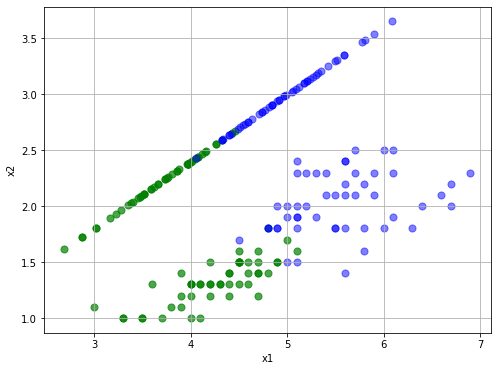

In [50]:
#################################################################
# Scatter points and final projection for 2 classes
# Data is un-normalized in this case
#################################################################
data_1 = data3[data3[:,-1]==1]
data_2 = data3[data3[:,-1]==2]
#Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(data_1[:,0], data_1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(data_2[:,0], data_2[:,1],s=50,marker='o', c='blue',alpha=0.5)
#plt.scatter(data_3[:,0], data_2[:,1],s=50,marker='o', c='red',alpha=0.5)

# Try to print the projections
proj_1 = proj[proj[:,-1]==1]
proj_2 = proj[proj[:,-1]==2]
#proj_3 = proj[proj[:,-1]==2]

plt.scatter(proj_1[:,0], proj_1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(proj_2[:,0], proj_2[:,1],s=50,marker='o', c='blue',alpha=0.5)
#plt.scatter(proj_3[:,0], proj_3[:,1],s=50,marker='o', c='red',alpha=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
# depict illustration
plt.grid()
plt.show()

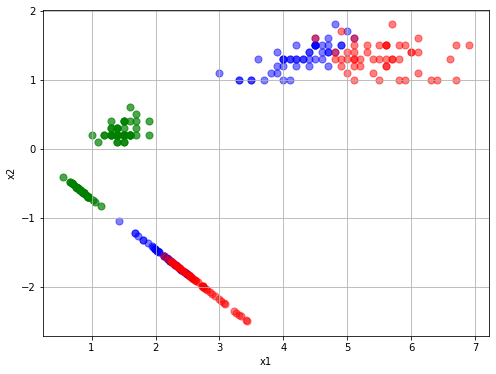

In [56]:
#################################################################
# Scatter points and final projection for 3 classes
# Data is un-normalized in this case
#################################################################
data_1 = data[data[:,-1]==0]
data_2 = data[data[:,-1]==1]
data_3 = data[data[:,-1]==2]
#Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(data_1[:,0], data_1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(data_2[:,0], data_2[:,1],s=50,marker='o', c='blue',alpha=0.5)
plt.scatter(data_3[:,0], data_2[:,1],s=50,marker='o', c='red',alpha=0.5)

# Try to print the projections
proj_1 = proj[proj[:,-1]==0]
proj_2 = proj[proj[:,-1]==1]
proj_3 = proj[proj[:,-1]==2]

plt.scatter(proj_1[:,0], proj_1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(proj_2[:,0], proj_2[:,1],s=50,marker='o', c='blue',alpha=0.5)
plt.scatter(proj_3[:,0], proj_3[:,1],s=50,marker='o', c='red',alpha=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
# depict illustration
plt.grid()
plt.show()

In [85]:
############################################################
# Full Dataset : Sepal Width,Sepal length, Petal Width, Petal Length
############################################################
from sklearn import datasets
import numpy as np
from sklearn.utils import shuffle
iris = datasets.load_iris()
X = iris.data[:, 0:4]  # we only consider all the 4 features
y = iris.target.reshape(len(X),1)
data = np.hstack((X,y))
data = shuffle(data)

In [88]:
# Testing the algorithm with 2 Unique classes
lda = LDA(data)
eig_vals,eig_vecs = lda.fit()

In [95]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.19192919827802
0.28539104262306564
1.3986499182256052e-14
1.426151419301068e-15


In [91]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.20874182 -0.00653196]
 [-0.38620369 -0.58661055]
 [ 0.55401172  0.25256154]
 [ 0.7073504  -0.76945309]]


In [98]:
transform = np.dot(data[:,0:-1],W)
transform =  np.hstack((transform,data[:,-1].reshape(len(transform),1)))

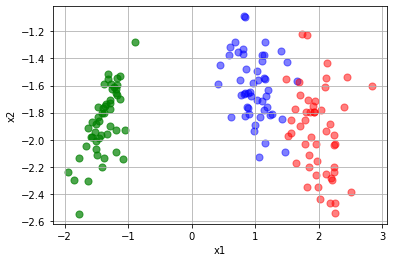

In [100]:
#################################################################
# Scatter points and final projection for 3 classes
# Displaying the transform 4D data into 2D space.
# Data is un-normalized in this case
#################################################################
#Scatter Plot
#plt.figure(figsize=(8,6))

# Try to print the projections
transform_1 = transform[transform[:,-1]==0]
transform_2 = transform[transform[:,-1]==1]
transform_3 = transform[transform[:,-1]==2]

plt.scatter(transform_1[:,0], transform_1[:,1], s=50,marker='o',c='green',alpha =0.7)
plt.scatter(transform_2[:,0], transform_2[:,1],s=50,marker='o', c='blue',alpha=0.5)
plt.scatter(transform_3[:,0], transform_3[:,1],s=50,marker='o', c='red',alpha=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
# depict illustration
plt.grid()
plt.show()

# Limitation of LDA

1. LDA produces at most C-1 feature projections
- if the classification error estimates establish that more features are needed, some other method must be employed to provide additional features.
2. LDA is a parametric method since it assumes unimodal Guassian Likelihoods
- If the distibution are significantly non-Gaussian, the LDA projections will not be able to preseve any complex structure of the data, which may be needed for classification.
3. LDA will fail when the discriminatory information is not in the mean but rather in the variance of the data